## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [23]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

In [24]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

KeyboardInterrupt: 

# 故意只跑到23 epoch

In [25]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 67us/step


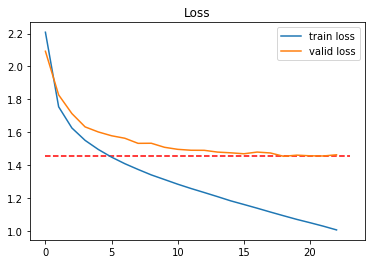

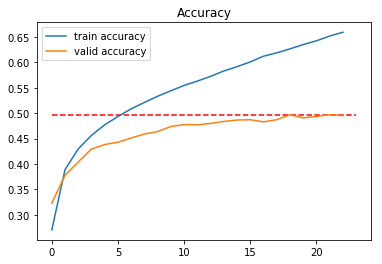

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

# 接著跑50個 epoch

In [27]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 25us/step - loss: 1.0700 - acc: 0.6349 - val_loss: 1.4674 - val_acc: 0.4929
Epoch 2/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.0493 - acc: 0.6433 - val_loss: 1.4623 - val_acc: 0.4951
Epoch 3/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.0278 - acc: 0.6515 - val_loss: 1.4706 - val_acc: 0.4922
Epoch 4/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.0078 - acc: 0.6593 - val_loss: 1.4574 - val_acc: 0.4961
Epoch 5/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.9874 - acc: 0.6655 - val_loss: 1.4546 - val_acc: 0.4988
Epoch 6/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.9663 - acc: 0.6751 - val_loss: 1.4709 - val_acc: 0.4947
Epoch 7/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.9454 - acc: 0.6832 - val_loss: 1.4749 - val_acc

10000/10000 [==============================] - 1s 70us/step


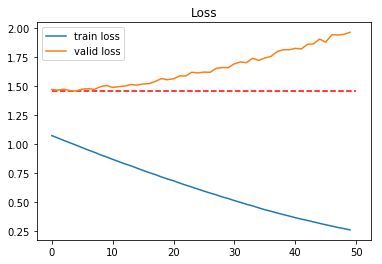

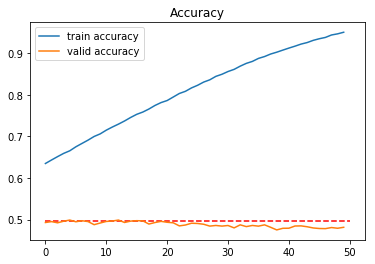

In [29]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

#  有沒有設定save_best_only 就是從最佳的參數重新開始
# 還是從最後一個epoch開始

# --------------------------------------------------------------------

# 再來是看save_weights_only = True

In [49]:
keras.backend.clear_session()

In [50]:
model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True,save_weights_only = True)

In [51]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

KeyboardInterrupt: 

In [52]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

ValueError: No model found in config file.

In [55]:
model.weights

[<tf.Variable 'hidden_layer1/kernel:0' shape=(3072, 512) dtype=float32_ref>,
 <tf.Variable 'hidden_layer1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/gamma:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'hidden_layer2/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'hidden_layer2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/gamma:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/beta:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'hidden_layer3/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'hidden_layer3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_3/gamma:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_3/beta:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'output/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'output/

In [56]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.9705 - acc: 0.6702 - val_loss: 1.4689 - val_acc: 0.4870
Epoch 2/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.9509 - acc: 0.6808 - val_loss: 1.4677 - val_acc: 0.4931
Epoch 3/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.9312 - acc: 0.6865 - val_loss: 1.4796 - val_acc: 0.4887
Epoch 4/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.9106 - acc: 0.6957 - val_loss: 1.4811 - val_acc: 0.4844
Epoch 5/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.8879 - acc: 0.7063 - val_loss: 1.4855 - val_acc: 0.4869
Epoch 6/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.8683 - acc: 0.7126 - val_loss: 1.4796 - val_acc: 0.4922
Epoch 7/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.8496 - acc: 0.7193 - val_loss: 1.4910 - val_acc

In [57]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

ValueError: No model found in config file.

因為只儲存了 weight  在./tmp.h5